In [13]:
from data_cleaning_bosch import structured_json_bosch_sensor

In [14]:
json_file_path = 'new_bosch_data.json'
structured_file_path_ouput = 'output'
result = 'baseline'

In [15]:
df = structured_json_bosch_sensor(json_file_path,structured_file_path_ouput, result)
df

/Users/danielfiuzadosil/Documents/GitHub/raptor_functions/raptor_functions/examples/bosch_data/data_cleaning_bosch.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['exp_unique_id'] = exp_unique_id


253


,exp_unique_id,real_time_clock,temperature_sensor_0,pressure_sensor_0,relative_humidity_sensor_0,resistance_gas_sensor_sensor_0,temperature_sensor_1,pressure_sensor_1,relative_humidity_sensor_1,resistance_gas_sensor_sensor_1,...,temperature_sensor_6,pressure_sensor_6,relative_humidity_sensor_6,resistance_gas_sensor_sensor_6,temperature_sensor_7,pressure_sensor_7,relative_humidity_sensor_7,resistance_gas_sensor_sensor_7,result,timesteps
0,0.0,2021-05-06 01:12:12,30.099798,1016.898499,42.087475,2.721595e+06,29.919815,1016.762390,43.269604,2.127792e+06,...,29.968113,1017.148804,41.818417,1.049180e+06,30.034039,1017.266785,42.907742,7.109568e+06,baseline,0
1,0.0,2021-05-06 01:12:13,31.566181,1016.925476,41.819595,1.262950e+05,31.497604,1016.764893,42.967094,1.124780e+05,...,31.611074,1017.204773,41.542645,5.756690e+04,31.657578,1017.319336,42.577545,3.488927e+05,baseline,1
2,0.0,2021-05-06 01:12:14,32.590897,1016.964600,40.720627,6.296114e+04,32.737137,1016.797424,41.771393,5.687625e+04,...,32.843937,1017.202881,40.378387,2.968460e+04,32.892296,1017.339111,41.434841,9.767264e+04,baseline,2
3,0.0,2021-05-06 01:12:17,33.131020,1016.918396,38.084511,1.214421e+05,33.466724,1016.797729,38.814636,1.088898e+05,...,33.532455,1017.213196,37.532791,5.649967e+04,33.654850,1017.348083,38.509724,1.767956e+05,baseline,3
4,0.0,2021-05-06 01:12:18,32.050774,1016.958496,37.163151,5.416198e+06,32.348362,1016.799561,37.724083,5.832680e+06,...,32.364212,1017.245972,36.486595,1.918501e+06,32.460518,1017.345825,37.436543,1.113044e+07,baseline,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,251.0,2021-05-06 01:42:08,43.111298,1016.934692,18.453411,3.903276e+07,43.502319,1016.749146,18.371756,2.628274e+07,...,41.469479,1017.078735,19.241982,1.736053e+07,41.609013,1017.226318,20.130537,4.563788e+07,baseline,4
1260,252.0,2021-05-06 01:42:09,42.828583,1016.894409,18.551609,3.618774e+07,43.174095,1016.729431,18.450209,2.463759e+07,...,41.126431,1017.077026,19.319780,1.614187e+07,41.280731,1017.213562,20.193075,4.265278e+07,baseline,0
1261,252.0,2021-05-06 01:42:09,43.626244,1016.907104,18.760057,1.890607e+06,43.918915,1016.687500,18.684637,1.354050e+06,...,41.921909,1017.059753,19.534370,9.063952e+05,42.063557,1017.226624,20.436197,2.375870e+06,baseline,1
1262,252.0,2021-05-06 01:42:11,44.317890,1016.883911,18.809307,3.150769e+05,44.691517,1016.703979,18.754587,2.194599e+05,...,42.699993,1017.100586,19.601068,1.658031e+05,42.836285,1017.210999,20.520655,3.368421e+05,baseline,2


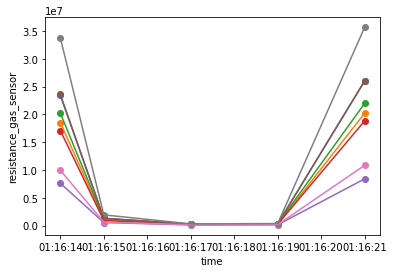

In [16]:
import matplotlib.pyplot as plt
i = 34
variable = 'resistance_gas_sensor'
df_temp = df[df['exp_unique_id'] == i]
for i in range(8):
    column_sensor = variable + '_sensor_' + str(i)
    plt.plot(df_temp['real_time_clock'], df_temp[column_sensor])
    plt.scatter(df_temp['real_time_clock'], df_temp[column_sensor])
    plt.xlabel('time')
    plt.ylabel(variable)

# Attempting Training ML Model

In [17]:
df.columns

Index(['exp_unique_id', 'real_time_clock', 'temperature_sensor_0',
       'pressure_sensor_0', 'relative_humidity_sensor_0',
       'resistance_gas_sensor_sensor_0', 'temperature_sensor_1',
       'pressure_sensor_1', 'relative_humidity_sensor_1',
       'resistance_gas_sensor_sensor_1', 'temperature_sensor_2',
       'pressure_sensor_2', 'relative_humidity_sensor_2',
       'resistance_gas_sensor_sensor_2', 'temperature_sensor_3',
       'pressure_sensor_3', 'relative_humidity_sensor_3',
       'resistance_gas_sensor_sensor_3', 'temperature_sensor_4',
       'pressure_sensor_4', 'relative_humidity_sensor_4',
       'resistance_gas_sensor_sensor_4', 'temperature_sensor_5',
       'pressure_sensor_5', 'relative_humidity_sensor_5',
       'resistance_gas_sensor_sensor_5', 'temperature_sensor_6',
       'pressure_sensor_6', 'relative_humidity_sensor_6',
       'resistance_gas_sensor_sensor_6', 'temperature_sensor_7',
       'pressure_sensor_7', 'relative_humidity_sensor_7',
       'resist

In [18]:
FEATURES = [
    "exp_unique_id",
    'temperature_sensor_0',
    'pressure_sensor_0', 'relative_humidity_sensor_0',
    'resistance_gas_sensor_sensor_0', 'temperature_sensor_1',
    'pressure_sensor_1', 'relative_humidity_sensor_1',
    'resistance_gas_sensor_sensor_1', 'temperature_sensor_2',
    'pressure_sensor_2', 'relative_humidity_sensor_2',
    'resistance_gas_sensor_sensor_2', 'temperature_sensor_3',
    'pressure_sensor_3', 'relative_humidity_sensor_3',
    'resistance_gas_sensor_sensor_3', 'temperature_sensor_4',
    'pressure_sensor_4', 'relative_humidity_sensor_4',
    'resistance_gas_sensor_sensor_4', 'temperature_sensor_5',
    'pressure_sensor_5', 'relative_humidity_sensor_5',
    'resistance_gas_sensor_sensor_5', 'temperature_sensor_6',
    'pressure_sensor_6', 'relative_humidity_sensor_6',
    'resistance_gas_sensor_sensor_6', 'temperature_sensor_7',
    'pressure_sensor_7', 'relative_humidity_sensor_7',
    'resistance_gas_sensor_sensor_7'
]

TARGET_COL = "result"
# METADATA_COLS = ["time_steps, exp_"]

In [19]:
# df_f = get_training_features(df, FEATURES, TARGET_COL, METADATA_COLS)
# -----
# should wor

In [20]:
import numpy as np
import pandas as pd
import xgboost as xgb
from boruta import BorutaPy
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import (
    ComprehensiveFCParameters,
    extract_features,
)
from tsfresh import extract_features
extraction_settings = ComprehensiveFCParameters()

In [21]:
def get_all_features(
    X,
    unique_id="exp_unique_id",
    # label="result",
    timesteps="timesteps",
    features=FEATURES,
):

    features = [col for col in X if col.startswith('sensor')]
    features = [unique_id, timesteps] + features

    X = X[features]

    # X = df.drop(label, axis=1)
    # y = df.groupby(unique_id).first()[label]

    X_extracted = extract_features(
        X,
        column_id=unique_id,
        column_sort=timesteps,
        default_fc_parameters=extraction_settings,
        # we impute = remove all NaN features automatically
        impute_function=impute,
    )

    return X_extracted


xgb = xgb.XGBClassifier()


def select_relevant_features(X, y, tree_model=xgb):

    boruta = BorutaPy(
            estimator=tree_model,
            n_estimators="auto",
            max_iter=50,  # number of trials to perform
            perc=80,
            alpha=0.05,
            two_step=False
        )

    # fit Boruta (it accepts np.array, not pd.DataFrame)
    boruta.fit(np.array(X), np.array(y))

    # green and blue area are the important features identified by boruta algorithm
    green_area = X.columns[boruta.support_].to_list()
    blue_area = X.columns[boruta.support_weak_].to_list()

    relevant_features = green_area + blue_area
    X = X[relevant_features]

    return  X

unique_id="exp_unique_id"
label="result"
timesteps="timesteps"

def add_offset_gradient(X_raw, offset=False, gradient=False):

    X_all = []
    X_all.append(X_raw)

    if offset:
        X_offset = offset_batch_samples(X_raw)
        X_offset = X_offset.add_suffix(f'_offset')
        X_all.append(X_offset)

    if gradient:
        X_gradient = gradient_batch_samples(X_raw)
        X_gradient = X_gradient.add_suffix(f'_gradient')
        X_all.append(X_gradient)

    X_all = pd.concat(X_all, axis=1)

    return X_all

def get_training_features(df, offset=False, gradient=False, tree_model=xgb):
    y = df.groupby(unique_id).first()[label]
    print(y)
    X = df.drop(label, axis=1)
    print(X)
    X = add_offset_gradient(X, offset, gradient)
    print(X)
    print('Extracting all features')
    X = get_all_features(X)
    print('Selecting relevant features')
    X = select_relevant_features(X, y, tree_model=tree_model)

    df = X.join(y)

    return df

In [22]:
get_training_features(df,offset=False, gradient=False)

exp_unique_id
0.0      baseline
1.0      baseline
2.0      baseline
3.0      baseline
4.0      baseline
           ...   
248.0    baseline
249.0    baseline
250.0    baseline
251.0    baseline
252.0    baseline
Name: result, Length: 253, dtype: object
      exp_unique_id     real_time_clock  temperature_sensor_0  \
0               0.0 2021-05-06 01:12:12             30.099798   
1               0.0 2021-05-06 01:12:13             31.566181   
2               0.0 2021-05-06 01:12:14             32.590897   
3               0.0 2021-05-06 01:12:17             33.131020   
4               0.0 2021-05-06 01:12:18             32.050774   
...             ...                 ...                   ...   
1259          251.0 2021-05-06 01:42:08             43.111298   
1260          252.0 2021-05-06 01:42:09             42.828583   
1261          252.0 2021-05-06 01:42:09             43.626244   
1262          252.0 2021-05-06 01:42:11             44.317890   
1263          252.0 2021-05-06 0

ValueError: Could not guess the value column! Please hand it to the function as an argument.